# Exploration Exercises
## Exercises I - Required
Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

import wrangle as w

sns.set_palette('plasma')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
train, validate, test = w.banana_split(df)

train --> (949, 4)
validate --> (407, 4)
test --> (339, 4)


In [5]:
correlation = train.corr()
correlation

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.402479,0.936214
tenure,0.402479,1.000000,0.640610
total_charges,0.936214,0.640610,1.000000


<AxesSubplot:>

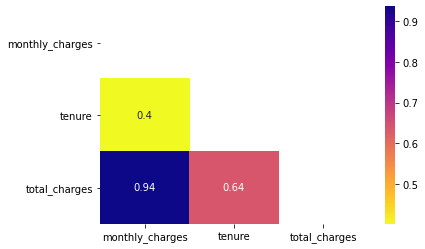

In [12]:
# create heatmap with correlations from before
sns.heatmap(correlation, annot=True, cmap = 'plasma_r', mask = np.triu(correlation))

### Takeaways Heatmap
- Monthly charges has the highest correlation with total charges
- maybe some sort of combination of the two would be best (monthly charges x tenure would and should equal total charges) 
- We'll stick with using just monthly charges right now but goals for later

In [8]:
# scale the data and try the heatmap again
# var names is defined below

scaler, scaled_cols_list = w.my_scaler(train, validate, test, var_names, MinMaxScaler(), 'MnMx')

Your scaled columns have been added to your train validate and test dataframes.


In [14]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_MnMx,tenure_MnMx,total_charges_MnMx
709,4312-KFRXN,25.40,72,1710.90,0.069825,1.000000,0.197333
1496,8838-GPHZP,20.60,63,1298.70,0.021945,0.875000,0.149791
1218,7208-PSIHR,104.30,70,7188.50,0.856858,0.972222,0.829114
1247,7416-CKTEP,19.60,57,1134.25,0.011970,0.791667,0.130823
1692,9975-GPKZU,19.75,46,856.50,0.013466,0.638889,0.098788


In [10]:
corr_scaled = train[scaled_cols_list].corr()
corr_scaled

,monthly_charges_MnMx,tenure_MnMx,total_charges_MnMx
monthly_charges_MnMx,1.000000,0.402479,0.936214
tenure_MnMx,0.402479,1.000000,0.640610
total_charges_MnMx,0.936214,0.640610,1.000000


<AxesSubplot:>

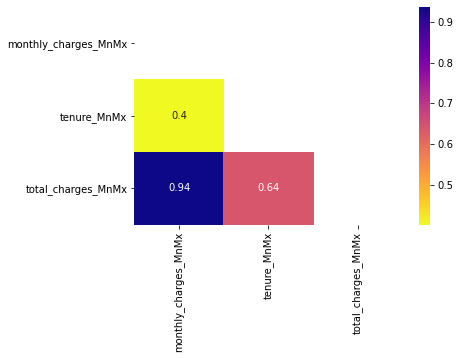

In [12]:
sns.heatmap(corr_scaled, annot=True, cmap = 'plasma_r', mask = np.triu(corr_scaled))

<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

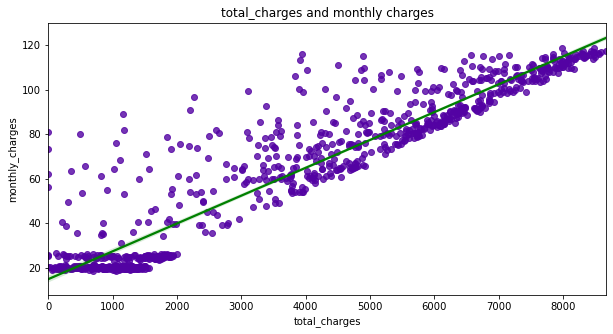

In [40]:
plt.figure(figsize=(10, 5))

sns.regplot(x = 'total_charges', y = 'monthly_charges', data = train, line_kws = {'color': 'green'})


plt.title('total_charges and monthly charges')
plt.show()

In [5]:
# make a list of the variable names
# this will be useful in a function later. will need to subsitute train for something maybe df of thats the input for the function
# and the name of the index column (here it's customer_id)

var_names = list(train.drop(columns = 'customer_id').columns)

In [7]:
var_names

['monthly_charges', 'tenure', 'total_charges']

In [61]:
# playing with itertools to figure out which one I want to use in my function
from itertools import permutations
from itertools import combinations

In [58]:
pairs = permutations(var_names, 2)

In [60]:
for pair in pairs:
    print(pair)

('monthly_charges', 'tenure')
('monthly_charges', 'total_charges')
('tenure', 'monthly_charges')
('tenure', 'total_charges')
('total_charges', 'monthly_charges')
('total_charges', 'tenure')


In [62]:
combos = combinations(var_names,2)

In [63]:
# I think combos is what I want. becuase I don't need all the variables potted double
for combo in combos:
    print(combo)

('monthly_charges', 'tenure')
('monthly_charges', 'total_charges')
('tenure', 'total_charges')


In [76]:
# must include from itertools import combinations
# Add plot titles

def plot_variable_pairs(df, cont_vars, dot_color = 'tab:blue', line_color = 'orange'):
    '''
    df = dataframe you want to pull from
    cont_vars = list of names of continuous variables for plotting
    dot_color = what color you want the dots to be (string), default is tableau blue
    line_color = what color you want the reg line to be (string), default is orange
    This function takes in a dataframe and a list of continous variables
    Plots them pairwise (only one plot for each relationship), with a regression line on a scatter plot
    '''
    # get combinations of all variables in list
    combos = combinations(cont_vars,2)
    
    # loop through iterables aka looping through the unique pairs of variables
    for combo in combos:
        
        # unpack each tuple
        x, y = combo
        
        # plot each one using the data from the inputted dataframe. use dot color and line color
        sns.regplot(x = x, y = y, data=df, scatter_kws = {'color': dot_color}, line_kws = {'color': line_color})
        plt.show()

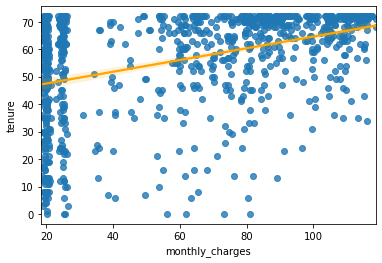

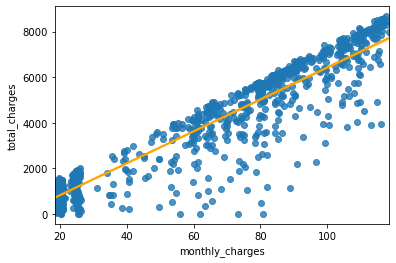

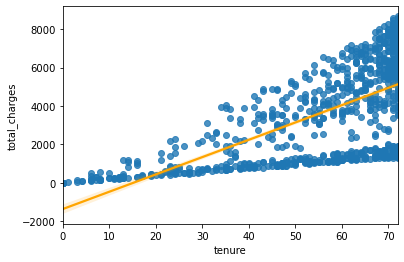

In [77]:
plot_variable_pairs(train, var_names)

<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [18]:
# month to year
# rules: bins will be 0-11, 12-23, 24-35,..... 
# Found // integer division. Which what I want
# in: df    out: return dataframe with new columns

def months_to_years(df, col_with_months = 'tenure'):
    '''
    This function takes in a dataframe and a column you want to change from months to years. Default column is tenure
    Bins for years are 0-11 = 0, 12-23 = 1, 24-35= 2, ...
    '''
    
    df['tenure_years'] = df[col_with_months] // 12
    
    return df

In [19]:
tester = months_to_years(df)

In [20]:
tester.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6


<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

6. Explore your dataset with any other visualizations you think will be helpful.


<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.